In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.special import expit
np.random.seed(42)

In [2]:
config = {
    "n_vehicles":100000,
    "start_year":2010,
    "end_year":2025,
    "target_migration_rate":0.05
}

# 02 — Brand Profile Generation

This section defines:
- Base reliability (2010)
- Annual reliability improvement
- EV adoption speed
- Warranty policy
- Brand value index

These values are based on real-world brand positioning,
engineering maturity, and EV transition speed.


In [3]:
brands_data = [
    # Japanese
    {"brand": "Toyota", "origin": "Japan", "base_rel": 0.88, "improve": 0.004, "ev_speed": 0.01, "brand_value": 0.90, "std_warranty": 5, "battery_warranty": 8},
    {"brand": "Honda", "origin": "Japan", "base_rel": 0.85, "improve": 0.004, "ev_speed": 0.01, "brand_value": 0.85, "std_warranty": 5, "battery_warranty": 8},
    {"brand": "Nissan", "origin": "Japan", "base_rel": 0.82, "improve": 0.005, "ev_speed": 0.015, "brand_value": 0.78, "std_warranty": 5, "battery_warranty": 8},
    {"brand": "Mazda", "origin": "Japan", "base_rel": 0.84, "improve": 0.004, "ev_speed": 0.01, "brand_value": 0.80, "std_warranty": 5, "battery_warranty": 8},
    {"brand": "Suzuki", "origin": "Japan", "base_rel": 0.83, "improve": 0.003, "ev_speed": 0.008, "brand_value": 0.75, "std_warranty": 5, "battery_warranty": 8},

    # German
    {"brand": "Volkswagen", "origin": "Germany", "base_rel": 0.78, "improve": 0.005, "ev_speed": 0.02, "brand_value": 0.82, "std_warranty": 4, "battery_warranty": 8},
    {"brand": "BMW", "origin": "Germany", "base_rel": 0.75, "improve": 0.005, "ev_speed": 0.02, "brand_value": 0.88, "std_warranty": 4, "battery_warranty": 8},
    {"brand": "Mercedes", "origin": "Germany", "base_rel": 0.76, "improve": 0.005, "ev_speed": 0.02, "brand_value": 0.92, "std_warranty": 4, "battery_warranty": 8},
    {"brand": "Audi", "origin": "Germany", "base_rel": 0.77, "improve": 0.005, "ev_speed": 0.02, "brand_value": 0.89, "std_warranty": 4, "battery_warranty": 8},

    # American
    {"brand": "Ford", "origin": "USA", "base_rel": 0.74, "improve": 0.004, "ev_speed": 0.015, "brand_value": 0.75, "std_warranty": 3, "battery_warranty": 8},
    {"brand": "Chevrolet", "origin": "USA", "base_rel": 0.73, "improve": 0.004, "ev_speed": 0.015, "brand_value": 0.72, "std_warranty": 3, "battery_warranty": 8},
    {"brand": "Tesla", "origin": "USA", "base_rel": 0.70, "improve": 0.02, "ev_speed": 0.05, "brand_value": 0.93, "std_warranty": 4, "battery_warranty": 8},

    # French
    {"brand": "Renault", "origin": "France", "base_rel": 0.76, "improve": 0.005, "ev_speed": 0.02, "brand_value": 0.74, "std_warranty": 4, "battery_warranty": 8},
    {"brand": "Peugeot", "origin": "France", "base_rel": 0.75, "improve": 0.005, "ev_speed": 0.02, "brand_value": 0.72, "std_warranty": 4, "battery_warranty": 8},

    # Korean
    {"brand": "Hyundai", "origin": "Korea", "base_rel": 0.80, "improve": 0.006, "ev_speed": 0.02, "brand_value": 0.78, "std_warranty": 5, "battery_warranty": 8},
    {"brand": "Kia", "origin": "Korea", "base_rel": 0.79, "improve": 0.006, "ev_speed": 0.02, "brand_value": 0.77, "std_warranty": 5, "battery_warranty": 8},

    # Chinese
    {"brand": "BYD", "origin": "China", "base_rel": 0.72, "improve": 0.015, "ev_speed": 0.05, "brand_value": 0.80, "std_warranty": 4, "battery_warranty": 8},
    {"brand": "Geely", "origin": "China", "base_rel": 0.74, "improve": 0.01, "ev_speed": 0.03, "brand_value": 0.76, "std_warranty": 4, "battery_warranty": 8},

    # Indian
    {"brand": "Tata", "origin": "India", "base_rel": 0.73, "improve": 0.01, "ev_speed": 0.03, "brand_value": 0.70, "std_warranty": 3, "battery_warranty": 8},
    {"brand": "Mahindra", "origin": "India", "base_rel": 0.72, "improve": 0.01, "ev_speed": 0.02, "brand_value": 0.68, "std_warranty": 3, "battery_warranty": 8},

    # Global
    {"brand": "Volvo", "origin": "Sweden", "base_rel": 0.82, "improve": 0.006, "ev_speed": 0.03, "brand_value": 0.88, "std_warranty": 4, "battery_warranty": 8},
]

brand_profile_df = pd.DataFrame(brands_data)
brand_profile_df.head()


,brand,origin,base_rel,improve,ev_speed,brand_value,std_warranty,battery_warranty
0,Toyota,Japan,0.88,0.004,0.010,0.90,5,8
1,Honda,Japan,0.85,0.004,0.010,0.85,5,8
2,Nissan,Japan,0.82,0.005,0.015,0.78,5,8
3,Mazda,Japan,0.84,0.004,0.010,0.80,5,8
4,Suzuki,Japan,0.83,0.003,0.008,0.75,5,8


# 03 — Regional Environment Generation

This section models:
- Climate conditions
- Infrastructure quality
- Traffic density
- Maintenance culture
- Licensing regulation strength
- Accident rate evolution
- Regional risk index

These evolve yearly (2010–2025).


In [4]:
countries = [
    "USA", "China", "Japan", "Germany", "India",
    "Brazil", "Russia", "Australia", "France", "South Africa"
]

In [5]:
base_environment = {
    "USA": {"road_quality": 0.80, "traffic": 0.75, "maintenance": 0.75, "licensing": 0.75},
    "China": {"road_quality": 0.65, "traffic": 0.85, "maintenance": 0.70, "licensing": 0.70},
    "Japan": {"road_quality": 0.85, "traffic": 0.70, "maintenance": 0.90, "licensing": 0.90},
    "Germany": {"road_quality": 0.90, "traffic": 0.75, "maintenance": 0.88, "licensing": 0.85},
    "India": {"road_quality": 0.45, "traffic": 0.90, "maintenance": 0.55, "licensing": 0.50},
    "Brazil": {"road_quality": 0.55, "traffic": 0.85, "maintenance": 0.60, "licensing": 0.60},
    "Russia": {"road_quality": 0.50, "traffic": 0.70, "maintenance": 0.60, "licensing": 0.65},
    "Australia": {"road_quality": 0.80, "traffic": 0.65, "maintenance": 0.85, "licensing": 0.85},
    "France": {"road_quality": 0.85, "traffic": 0.75, "maintenance": 0.85, "licensing": 0.85},
    "South Africa": {"road_quality": 0.60, "traffic": 0.75, "maintenance": 0.65, "licensing": 0.60}
}

In [6]:
years = range(2010, 2026)

regional_rows = []

for country in countries:
    base = base_environment[country]
    
    for year in years:
        delta = year - 2010
        
        road_quality = min(1.0, base["road_quality"] + 0.01 * delta if base["road_quality"] < 0.7 else base["road_quality"] + 0.002 * delta)
        traffic = min(1.0, base["traffic"] + 0.005 * delta)
        maintenance = min(1.0, base["maintenance"] + 0.003 * delta)
        licensing = min(1.0, base["licensing"] + 0.002 * delta)
        
        # Composite regional risk (higher traffic + lower road quality = higher risk)
        regional_risk = (
            (1 - road_quality) * 0.4 +
            traffic * 0.3 +
            (1 - maintenance) * 0.2 +
            (1 - licensing) * 0.1
        )
        
        regional_rows.append({
            "country": country,
            "year": year,
            "road_quality": road_quality,
            "traffic_density": traffic,
            "maintenance_culture": maintenance,
            "licensing_strength": licensing,
            "regional_risk_index": regional_risk
        })

regional_environment_df = pd.DataFrame(regional_rows)
regional_environment_df.head()
regional_environment_df.tail()

,country,year,road_quality,traffic_density,maintenance_culture,licensing_strength,regional_risk_index
155,South Africa,2021,0.71,0.805,0.683,0.622,0.4587
156,South Africa,2022,0.72,0.810,0.686,0.624,0.4554
157,South Africa,2023,0.73,0.815,0.689,0.626,0.4521
158,South Africa,2024,0.74,0.820,0.692,0.628,0.4488
159,South Africa,2025,0.75,0.825,0.695,0.630,0.4455


# 04 — Market Share Model

This section defines:

- Brand market share by country (2010 baseline)
- Yearly EV transition effect
- Vehicle class evolution (SUV growth trend)
- Fuel type evolution (Petrol/Diesel → Hybrid/EV)

Market share evolves from 2010–2025.


In [7]:
base_market_share_2010 = {
    "USA": {"Ford": 0.18, "Chevrolet": 0.16, "Tesla": 0.05, "Toyota": 0.14, "Honda": 0.10},
    "Japan": {"Toyota": 0.35, "Honda": 0.20, "Nissan": 0.18, "Mazda": 0.10, "Suzuki": 0.07},
    "Germany": {"Volkswagen": 0.25, "BMW": 0.12, "Mercedes": 0.12, "Audi": 0.10},
    "India": {"Suzuki": 0.40, "Tata": 0.15, "Mahindra": 0.15, "Hyundai": 0.12},
    "China": {"BYD": 0.12, "Geely": 0.10, "Volkswagen": 0.14, "Toyota": 0.10},
    "France": {"Renault": 0.28, "Peugeot": 0.22, "Volkswagen": 0.10},
    "Brazil": {"Chevrolet": 0.20, "Volkswagen": 0.18, "Toyota": 0.12},
    "Russia": {"Volkswagen": 0.15, "Toyota": 0.14, "Hyundai": 0.12},
    "Australia": {"Toyota": 0.20, "Ford": 0.18, "Hyundai": 0.12},
    "South Africa": {"Toyota": 0.22, "Volkswagen": 0.18, "Ford": 0.12}
}

In [8]:
all_brands = brand_profile_df["brand"].tolist()
years = range(2010, 2026)

market_rows = []

for country in countries:
    base_share = base_market_share_2010.get(country, {})
    
    for year in years:
        delta = year - 2010
        
        country_shares = {}
        
        # Start with base shares
        total_defined = sum(base_share.values())
        
        for brand in all_brands:
            if brand in base_share:
                share = base_share[brand]
                
                # EV-heavy brands grow after 2015
                if brand in ["Tesla", "BYD"] and year >= 2015:
                    share += 0.01 * (year - 2015)
                
                country_shares[brand] = share
            else:
                # distribute remaining share
                country_shares[brand] = (1 - total_defined) / (len(all_brands) - len(base_share))
        
        # Normalize
        total = sum(country_shares.values())
        for brand in country_shares:
            country_shares[brand] /= total
        
        for brand, share in country_shares.items():
            market_rows.append({
                "country": country,
                "year": year,
                "brand": brand,
                "market_share": share
            })

market_share_df = pd.DataFrame(market_rows)
market_share_df.head()
market_share_df.tail()
market_share_df.shape

(3360, 4)

# 05 — Vehicle Master Generation

This section generates 100,000 vehicles using:

- Country distribution
- Brand market share (country + year)
- Vehicle class distribution
- Fuel type distribution
- Brand reliability initialization

Each vehicle receives:
- Brand
- Country of sale
- Manufacturing year
- Vehicle class
- Fuel type
- Base price
- Initial system reliability
- Extended warranty flag


In [9]:
n_vehicles = config["n_vehicles"]

manufacturing_years = np.random.choice(
    list(range(2010, 2026)),
    size=n_vehicles,
    p=np.linspace(0.05, 0.12, 16) / np.linspace(0.05, 0.12, 16).sum()
)


In [10]:
initial_countries = np.random.choice(countries, size=n_vehicles)


In [11]:
vehicle_brands = []

for country, year in zip(initial_countries, manufacturing_years):
    shares = market_share_df[
        (market_share_df["country"] == country) &
        (market_share_df["year"] == year)
    ]
    
    vehicle_brands.append(
        np.random.choice(
            shares["brand"],
            p=shares["market_share"]
        )
    )


In [12]:
vehicle_classes = []

for year in manufacturing_years:
    suv_prob = 0.25 + 0.02 * (year - 2010)  # SUV growth
    sedan_prob = 0.30
    hatch_prob = 0.30 - 0.01 * (year - 2010)
    truck_prob = 1 - (suv_prob + sedan_prob + hatch_prob)
    
    vehicle_classes.append(
        np.random.choice(
            ["SUV", "Sedan", "Hatchback", "Truck"],
            p=[suv_prob, sedan_prob, hatch_prob, truck_prob]
        )
    )


In [13]:
vehicle_fuels = []

for brand, year in zip(vehicle_brands, manufacturing_years):
    
    brand_info = brand_profile_df[brand_profile_df["brand"] == brand].iloc[0]
    
    ev_prob = min(0.4, brand_info["ev_speed"] * (year - 2010))
    hybrid_prob = 0.15
    diesel_prob = 0.20
    petrol_prob = 1 - (ev_prob + hybrid_prob + diesel_prob)
    
    vehicle_fuels.append(
        np.random.choice(
            ["Petrol", "Diesel", "Hybrid", "EV"],
            p=[petrol_prob, diesel_prob, hybrid_prob, ev_prob]
        )
    )


In [14]:
initial_power_rel = []
initial_motion_rel = []
initial_control_rel = []
initial_struct_rel = []

for brand, year in zip(vehicle_brands, manufacturing_years):
    
    info = brand_profile_df[brand_profile_df["brand"] == brand].iloc[0]
    
    rel = info["base_rel"] + (year - 2010) * info["improve"]
    rel = min(0.97, rel)
    
    initial_power_rel.append(rel)
    initial_motion_rel.append(rel - 0.01)
    initial_control_rel.append(rel - 0.02)
    initial_struct_rel.append(rel - 0.005)


In [15]:
extended_flags = []

for brand in vehicle_brands:
    prob = brand_profile_df[
        brand_profile_df["brand"] == brand
    ]["std_warranty"].values[0] / 10  # simple proxy
    
    extended_flags.append(np.random.rand() < prob)


In [16]:
vehicle_master_df = pd.DataFrame({
    "vehicle_id": range(1, n_vehicles + 1),
    "brand": vehicle_brands,
    "manufacturing_year": manufacturing_years,
    "initial_country": initial_countries,
    "vehicle_class": vehicle_classes,
    "fuel_type": vehicle_fuels,
    "power_rel_init": initial_power_rel,
    "motion_rel_init": initial_motion_rel,
    "control_rel_init": initial_control_rel,
    "struct_rel_init": initial_struct_rel,
    "extended_warranty": extended_flags
})

vehicle_master_df.head()


,vehicle_id,brand,manufacturing_year,initial_country,vehicle_class,fuel_type,power_rel_init,motion_rel_init,control_rel_init,struct_rel_init,extended_warranty
0,1,BYD,2017,China,Sedan,EV,0.825,0.815,0.805,0.820,False
1,2,Toyota,2025,Australia,SUV,Hybrid,0.940,0.930,0.920,0.935,True
2,3,Renault,2022,France,SUV,Hybrid,0.820,0.810,0.800,0.815,False
3,4,Chevrolet,2021,USA,Sedan,Diesel,0.774,0.764,0.754,0.769,False
4,5,Kia,2013,Brazil,Truck,Diesel,0.808,0.798,0.788,0.803,False


In [17]:
vehicle_master_df.shape

(100000, 11)

# 06 — Lifecycle Simulation Engine

This section simulates yearly evolution for each vehicle:

For each vehicle-year:
- Compute stress (based on region + class + fuel)
- Degrade system health
- Compute failure probability (logistic model)
- Simulate failures
- Apply repair costs
- Compute depreciation
- Update market value
- Stop lifecycle if catastrophic removal


In [18]:
from scipy.special import expit  # logistic function

def failure_probability(health, stress, age, maintenance_factor):
    health_risk = expit(-(health - 0.5) * 10)  # health scaled 0–1
    age_factor = 1 + 0.05 * age
    return health_risk * stress * age_factor * (1 - maintenance_factor)


In [20]:
def accident_probability(regional_risk, traffic_density, age):
    base = 0.01  # 1% base
    risk_component = regional_risk * 0.05
    traffic_component = traffic_density * 0.03
    age_component = age * 0.005
    
    return min(0.15, base + risk_component + traffic_component + age_component)


In [22]:
def accident_severity():
    return np.random.choice(
        [1, 2, 3],
        p=[0.70, 0.20, 0.10]  # 10% catastrophic
    )


In [46]:
lifecycle_rows = []
accident_rows = []
insurance_rows = []

for _, vehicle in vehicle_master_df.iterrows():
    
    vehicle_id = vehicle["vehicle_id"]
    manufacture_year = vehicle["manufacturing_year"]
    
    current_power = vehicle["power_rel_init"]
    current_motion = vehicle["motion_rel_init"]
    current_control = vehicle["control_rel_init"]
    current_struct = vehicle["struct_rel_init"]
    
    base_price = 30000  # placeholder (we refine later)
    current_value = base_price
    
    removed = False
    
    for year in range(manufacture_year, 2026):
        
        if removed:
            break
        
        age = year - manufacture_year

        oem_cost = 0
        customer_cost = 0
        insurance_claim = 0

        base_premium = 800
        risk_factor = 1 + region_data["regional_risk_index"]
        claim_factor = 1 + (insurance_claim / 10000)

        insurance_premium = base_premium * risk_factor * claim_factor
        
        region_data = regional_environment_df[
            (regional_environment_df["country"] == vehicle["initial_country"]) &
            (regional_environment_df["year"] == year)
        ].iloc[0]
        
        stress = region_data["regional_risk_index"]
        maintenance = region_data["maintenance_culture"]
        
        # Degradation
        current_power -= 0.02 * stress
        current_motion -= 0.015 * stress
        current_control -= 0.01 * stress
        current_struct -= 0.01 * stress
        
        # Clamp
        current_power = max(0, current_power)
        current_motion = max(0, current_motion)
        current_control = max(0, current_control)
        current_struct = max(0, current_struct)

        annual_mileage = np.random.normal(15000, 3000)
        annual_mileage = max(5000, annual_mileage)

        if year == manufacture_year:
            cumulative_mileage = annual_mileage
        else:
            cumulative_mileage += annual_mileage

        
        # Failure probability
        power_fail = np.random.rand() < failure_probability(current_power, stress, age, maintenance)
        motion_fail = np.random.rand() < failure_probability(current_motion, stress, age, maintenance)
        control_fail = np.random.rand() < failure_probability(current_control, stress, age, maintenance)
        struct_fail = np.random.rand() < failure_probability(current_struct, stress, age, maintenance)
        
        repair_cost = 0
        
        if power_fail:
            cost = 2000
            repair_cost += 2000
            current_power += 0.2

            if under_warranty(manufacture_year, year, cumulative_mileage):
                oem_cost += 2000
            else:
                customer_cost += 2000
        
        if motion_fail:
            repair_cost += 1500
            current_motion += 0.2
        
        if control_fail:
            repair_cost += 1000
            current_control += 0.2
        
        if struct_fail:
            repair_cost += 1200
            current_struct += 0.2


        # accident
        acc_prob = accident_probability(
        region_data["regional_risk_index"],
        region_data["traffic_density"],
        age
        )

        if np.random.rand() < acc_prob:
            severity = accident_severity()
    
            if severity == 1:
                insurance_claim = 1000
                current_value *= 0.97
        
            elif severity == 2:
                insurance_claim = 4000
                current_value *= 0.90
        
            elif severity == 3:
                insurance_claim = 10000
                current_value *= 0.50
                removed = True
    
            accident_rows.append({
                "vehicle_id": vehicle_id,
                "year": year,
                "severity": severity,
                "insurance_claim": insurance_claim,
                "removed": removed
            })

        # insurance 
        insurance_rows.append({
            "vehicle_id": vehicle_id,
            "year": year,
            "premium": insurance_premium,
            "risk_factor": risk_factor,
            "claim_factor": claim_factor
        })
        
        # Depreciation
        depreciation_rate = 0.08 + (1 - np.mean([current_power, current_motion, current_control, current_struct])) * 0.2
        current_value *= (1 - depreciation_rate)
        
        lifecycle_rows.append({
            "vehicle_id": vehicle_id,
            "year": year,
            "age": age,
            "power_health": current_power,
            "motion_health": current_motion,
            "control_health": current_control,
            "struct_health": current_struct,
            "repair_cost": repair_cost,
            "market_value": current_value,
            "oem_cost": oem_cost,
            "customer_cost": customer_cost,
            "insurance_claim": insurance_claim,
            "cumulative_mileage": cumulative_mileage,
        })


In [61]:
vehicle_lifecycle_df = pd.DataFrame(lifecycle_rows)
vehicle_lifecycle_df["failure_this_year"] = (
    vehicle_lifecycle_df["repair_cost"] > 0
).astype(int)

vehicle_lifecycle_df.head()

,vehicle_id,year,age,power_health,motion_health,control_health,struct_health,repair_cost,market_value,oem_cost,customer_cost,insurance_claim,cumulative_mileage,failure_this_year
0,1,2017,0,0.815762,0.808071,0.800381,0.815381,0,26459.393250,0,0,0,12252.759196,0
1,1,2018,1,0.806590,0.801192,0.795795,0.810795,0,23303.280441,0,0,0,24430.547348,0
2,1,2019,2,0.797484,0.794363,0.791242,0.806242,0,20494.455654,0,0,0,48675.259884,0
3,1,2020,3,0.788444,0.787583,0.786722,0.801722,0,17458.752191,0,0,1000,66144.223756,0
4,1,2021,4,0.779470,0.780852,0.782235,0.797235,0,15311.144537,0,0,0,82240.031235,0


In [48]:
vehicle_lifecycle_df.shape

(710151, 13)

# 07 — Accident Engine

This module simulates yearly accident events:

Accident probability depends on:
- Regional risk index
- Traffic density
- Vehicle age
- Vehicle class

Severity Levels:
0 → No accident
1 → Minor
2 → Moderate
3 → Catastrophic (vehicle removed)

Catastrophic accidents terminate lifecycle.


In [37]:
# --- ACCIDENT LOGIC START ---
# accident_rows = []
accident_flag = False
severity = 0
insurance_claim = 0

acc_prob = accident_probability(
    region_data["regional_risk_index"],
    region_data["traffic_density"],
    age
)

if np.random.rand() < acc_prob:
    accident_flag = True
    severity = accident_severity()
    
    if severity == 1:
        insurance_claim = 1000
        current_value *= 0.97
        
    elif severity == 2:
        insurance_claim = 4000
        current_value *= 0.90
        
    elif severity == 3:
        insurance_claim = 10000
        current_value *= 0.50
        removed = True
    
    accident_rows.append({
        "vehicle_id": vehicle_id,
        "year": year,
        "severity": severity,
        "insurance_claim": insurance_claim,
        "removed": removed
    })

# --- ACCIDENT LOGIC END ---

In [38]:

if accident_flag:
    accident_rows.append({
        "vehicle_id": vehicle_id,
        "year": year,
        "severity": severity,
        "insurance_claim": insurance_claim,
        "removed": removed
    })

In [39]:
accident_events_df = pd.DataFrame(accident_rows)
accident_events_df.head()

,vehicle_id,year,severity,insurance_claim,removed
0,4,2023,1,1000,False
1,5,2013,1,1000,False
2,5,2024,1,1000,False
3,6,2016,1,1000,False
4,6,2022,1,1000,False


In [40]:
accident_events_df["severity"].value_counts()


severity
1    38542
2    10969
3     5384
Name: count, dtype: int64

In [41]:
accident_events_df.columns


Index(['vehicle_id', 'year', 'severity', 'insurance_claim', 'removed'], dtype='object')

# 08 — Warranty & Insurance Engine

This module:

- Determines if vehicle is under warranty
- Splits repair cost between OEM and customer
- Tracks warranty exposure per brand
- Models insurance premium evolution
- Tracks claim count per vehicle


In [42]:
def under_warranty(manufacture_year, current_year, cumulative_mileage, std_years=3, std_km=100000):
    years_active = current_year - manufacture_year
    return (years_active <= std_years) and (cumulative_mileage <= std_km)


In [43]:
def under_battery_warranty(manufacture_year, current_year, cumulative_mileage, years=8, km=160000):
    years_active = current_year - manufacture_year
    return (years_active <= years) and (cumulative_mileage <= km)


In [49]:
insurance_history_df = pd.DataFrame(insurance_rows)


In [50]:
insurance_history_df.shape

(710151, 5)

# 09 — KPI Engine

This module computes:

- Failure rate by brand
- Warranty exposure by brand & country
- Insurance claim burden
- Residual value curves
- EV vs ICE cost comparison
- Total Cost of Ownership (TCO)


In [51]:
failure_summary = (
    vehicle_lifecycle_df
    .assign(failure=lambda df: df["repair_cost"] > 0)
    .groupby("vehicle_id")["failure"]
    .sum()
    .reset_index()
)

failure_summary = failure_summary.merge(
    vehicle_master_df[["vehicle_id", "brand"]],
    on="vehicle_id"
)

brand_failure_rate = (
    failure_summary
    .groupby("brand")["failure"]
    .mean()
    .sort_values(ascending=False)
)

brand_failure_rate.head(10)


brand
Mahindra      0.524564
Tata          0.464891
Chevrolet     0.462953
Suzuki        0.311915
Ford          0.306510
Geely         0.303751
Volkswagen    0.276678
BYD           0.271663
Tesla         0.264667
Hyundai       0.253612
Name: failure, dtype: float64

In [52]:
brand_warranty_cost = (
    vehicle_lifecycle_df
    .groupby("vehicle_id")["oem_cost"]
    .sum()
    .reset_index()
    .merge(vehicle_master_df[["vehicle_id", "brand"]], on="vehicle_id")
    .groupby("brand")["oem_cost"]
    .sum()
    .sort_values(ascending=False)
)

brand_warranty_cost.head(10)


brand
Volkswagen    506000
Chevrolet     452000
Suzuki        376000
Ford          374000
Mahindra      320000
Tata          282000
Toyota        194000
Hyundai       186000
Peugeot       156000
BMW           140000
Name: oem_cost, dtype: int64

In [53]:
insurance_country = (
    accident_events_df
    .merge(vehicle_master_df[["vehicle_id", "initial_country"]], on="vehicle_id")
    .groupby("initial_country")["insurance_claim"]
    .sum()
    .sort_values(ascending=False)
)

insurance_country


initial_country
India           16147000
Brazil          14877000
China           14383000
South Africa    14368000
Russia          13953000
France          12943000
USA             12889000
Germany         12515000
Australia       12234000
Japan           11949000
Name: insurance_claim, dtype: int64

<Axes: title={'center': 'Average Market Value by Age'}, xlabel='age'>

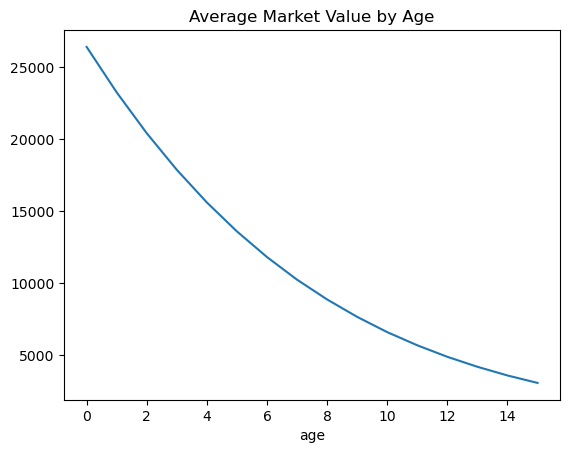

In [54]:
value_curve = (
    vehicle_lifecycle_df
    .groupby("age")["market_value"]
    .mean()
)

value_curve.plot(title="Average Market Value by Age")


In [55]:
tco_df = (
    vehicle_lifecycle_df
    .groupby("vehicle_id")
    .agg({
        "repair_cost": "sum",
        "oem_cost": "sum",
        "customer_cost": "sum",
        "insurance_claim": "sum",
        "market_value": "last"
    })
    .reset_index()
)

tco_df = tco_df.merge(
    vehicle_master_df[["vehicle_id", "fuel_type"]],
    on="vehicle_id"
)

tco_df["total_cost"] = (
    tco_df["repair_cost"] +
    tco_df["insurance_claim"]
)

tco_summary = tco_df.groupby("fuel_type")["total_cost"].mean()

tco_summary


fuel_type
Diesel    1733.944123
EV        1078.994796
Hybrid    1748.064706
Petrol    1958.707339
Name: total_cost, dtype: float64

In [56]:
brand_failure_rate_yearly = (
    vehicle_lifecycle_df
    .assign(failure=lambda df: df["repair_cost"] > 0)
    .merge(vehicle_master_df[["vehicle_id", "brand"]], on="vehicle_id")
    .groupby("brand")["failure"]
    .mean()
)


In [57]:
brand_failure_rate_yearly.head(10)

brand
Audi         0.032627
BMW          0.035768
BYD          0.040500
Chevrolet    0.064651
Ford         0.042641
Geely        0.042620
Honda        0.012876
Hyundai      0.035530
Kia          0.030688
Mahindra     0.073833
Name: failure, dtype: float64

In [59]:
brand_failure_counts = (
    vehicle_lifecycle_df
    .assign(failure=lambda df: df["repair_cost"] > 0)
    .merge(vehicle_master_df[["vehicle_id", "brand"]], on="vehicle_id")
    .groupby("brand")["failure"]
    .sum()
)

brand_oem_cost = (
    vehicle_lifecycle_df
    .merge(vehicle_master_df[["vehicle_id", "brand"]], on="vehicle_id")
    .groupby("brand")["oem_cost"]
    .sum()
)

brand_warranty_analysis = pd.DataFrame({
    "total_failures": brand_failure_counts,
    "oem_cost": brand_oem_cost
})

brand_warranty_analysis["cost_per_failure"] = (
    brand_warranty_analysis["oem_cost"] /
    brand_warranty_analysis["total_failures"]
)

brand_warranty_analysis.sort_values("cost_per_failure", ascending=False)


,total_failures,oem_cost,cost_per_failure
brand,,,
Mazda,396,86000,217.171717
Audi,707,140000,198.019802
Ford,1935,374000,193.281654
Chevrolet,2468,452000,183.144246
Kia,505,92000,182.178218
Mercedes,738,134000,181.571816
Suzuki,2131,376000,176.442985
Volkswagen,2878,506000,175.816539
Honda,449,76000,169.265033


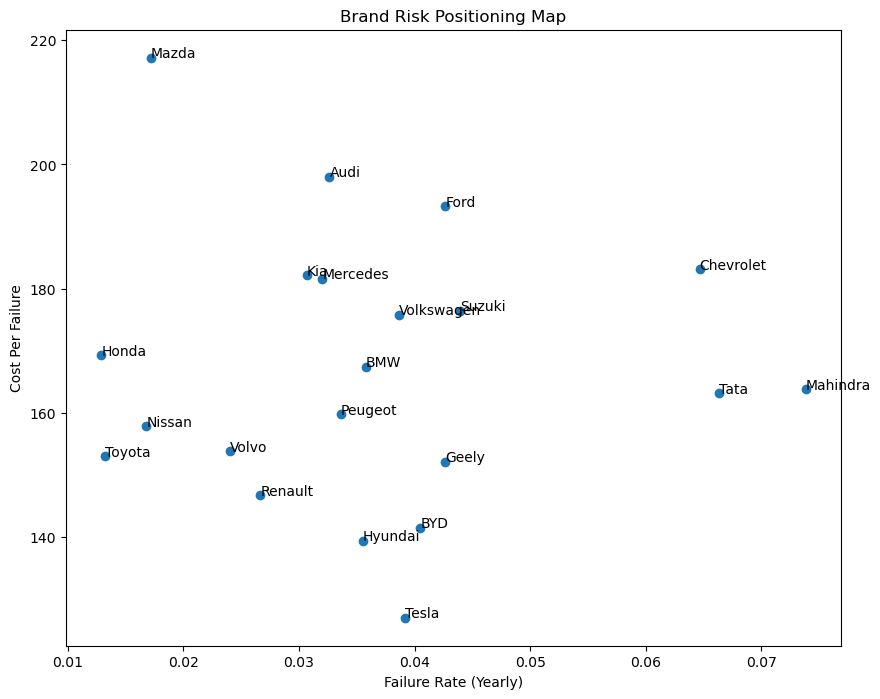

In [60]:
brand_analysis = brand_warranty_analysis.merge(
    brand_failure_rate_yearly.rename("failure_rate"),
    left_index=True,
    right_index=True
)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(
    brand_analysis["failure_rate"],
    brand_analysis["cost_per_failure"]
)

for brand in brand_analysis.index:
    plt.text(
        brand_analysis.loc[brand, "failure_rate"],
        brand_analysis.loc[brand, "cost_per_failure"],
        brand
    )

plt.xlabel("Failure Rate (Yearly)")
plt.ylabel("Cost Per Failure")
plt.title("Brand Risk Positioning Map")
plt.show()
